<a href="https://colab.research.google.com/github/gaiksa01/gaiksa01/blob/main/Diabetes_SL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import (GridSearchCV, train_test_split, validation_curve)   
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
from sklearn.svm import SVC
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn import preprocessing
from sklearn.model_selection import learning_curve
import math
import time
import warnings
warnings.filterwarnings("ignore")
np.random.seed(50)
%load_ext autoreload
%autoreload 2

In [3]:

db_set=pd.read_csv('Pima_diabetes.csv')

#feature variables
X=db_set.drop(['Outcome'], axis=1)
#target variable
y=db_set.Outcome

print('Total number of examples in the dataset: %d' % X.shape[0])
print('Fraction of positive examples: %.2f%%' % (y[y == 1].shape[0]/y.shape[0]*100.0))

# Standardize data
X = preprocessing.scale(X)
# Data structures for storing best accuracies, training time and test time
num_classifiers = 5
best_accuracy = np.zeros(num_classifiers)
train_time = np.zeros(num_classifiers)
test_time = np.zeros(num_classifiers)

Total number of examples in the dataset: 768
Fraction of positive examples: 34.90%


In [4]:
db_set['BMI'] = db_set['BMI'].replace(0, db_set['BMI'].mean())
db_set['BloodPressure'] = db_set['BloodPressure'].replace(0, db_set['BloodPressure'].mean())
db_set['Glucose'] = db_set['Glucose'].replace(0, db_set['Glucose'].mean())
db_set['Insulin'] = db_set['Insulin'].replace(0, db_set['Insulin'].mean())
db_set['SkinThickness'] = db_set['SkinThickness'].replace(0, db_set['SkinThickness'].mean())

In [5]:
outlier = db_set['Pregnancies'].quantile(0.98)
# removing the top 2% data from the pregnancies column
db_set = db_set[db_set['Pregnancies']<outlier]

outlier = db_set['BMI'].quantile(0.99)
# removing the top 1% data from BMI column
db_set = db_set[db_set['BMI']<outlier]

outlier = db_set['SkinThickness'].quantile(0.99)
# removing the top 1% data from SkinThickness column
db_set = db_set[db_set['SkinThickness']<outlier]

outlier = db_set['Insulin'].quantile(0.95)
# removing the top 5% data from Insulin column
data = db_set[db_set['Insulin']<outlier]

outlier = db_set['DiabetesPedigreeFunction'].quantile(0.99)
# removing the top 1% data from DiabetesPedigreeFunction column
data = db_set[db_set['DiabetesPedigreeFunction']<outlier]


outlier = db_set['Age'].quantile(0.99)
# removing the top 1% data from Age column
data = db_set[db_set['Age']<outlier]

In [6]:
db_set.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [7]:
db_set.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000,728.000000
mean,3.605769,121.473177,71.930605,26.004786,118.200843,32.029696,0.468764,32.962912,0.339286
std,2.997903,30.428758,11.904710,8.667731,91.949696,6.389506,0.326924,11.716857,0.473792
min,0.000000,44.000000,24.000000,7.000000,15.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,20.536458,79.799479,27.400000,0.240000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,22.000000,79.799479,31.992578,0.367000,29.000000,0.000000
75%,6.000000,140.000000,80.000000,32.000000,126.250000,35.925000,0.624500,40.000000,1.000000
max,11.000000,199.000000,122.000000,49.000000,846.000000,50.000000,2.329000,81.000000,1.000000


Text(0, 0.5, '# of Samples')

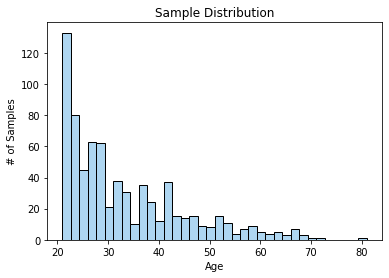

In [8]:
plt.hist(db_set['Age'], color = '#AED6F1', edgecolor = 'black',
         bins = int(180/5))

plt.title('Sample Distribution')
plt.xlabel('Age')
plt.ylabel('# of Samples')

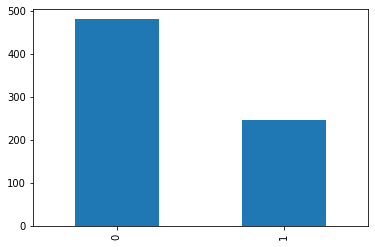

In [9]:
db_set['Outcome'].value_counts().plot.bar()

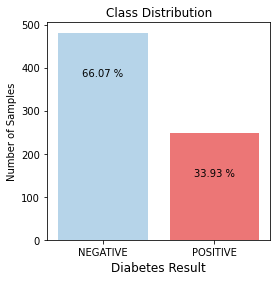

In [10]:

plt.figure(figsize = (4,4))
graph_target = sns.countplot(x="Outcome", data=db_set, palette=['#AED6F1','#FF6363'])

i=0
for p in graph_target.patches:
    height = p.get_height()
    
    percentage = round(100 * db_set["Outcome"].value_counts()[i] / len(db_set),2)
    
    str_plot = f'{percentage} %'
    
    graph_target.text(p.get_x()+p.get_width()/2., height - 100, str_plot, ha="center")
    i += 1

plt.xticks([0,1],['NEGATIVE', 'POSITIVE'])
plt.xlabel('Diabetes Result', fontsize=12)
plt.ylabel('Number of Samples')

plt.title('Class Distribution')
plt.show()

In [11]:
# Split into training and test data. Use random_state to get the same results in every run
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)
print('Training set shape: ', np.shape(X_train))
print(f'- Positive:\t {len(y_train[y_train==1])}')
print(f'- Negative: {len(y_train[y_train==0])}')
print('Test set shape: ', np.shape(X_test))
print(f'- Positive:\t {len(y_test[y_test==1])}')
print(f'- Negative: {len(y_test[y_test==0])}')

Training set shape:  (537, 8)
- Positive:	 170
- Negative: 367
Test set shape:  (231, 8)
- Positive:	 98
- Negative: 133


In [12]:
min_train = X_train.min()
range_train = (X_train - min_train).max()
X_train_scaled = (X_train - min_train)/range_train

In [13]:
min_test = X_test.min()
range_test = (X_test - min_test).max()
X_test_scaled = (X_test - min_test)/range_test

#Evaluate All models without hyper paramter 

In [14]:
models = []
models.append(('Decision trees', DecisionTreeClassifier()))
models.append(('Neural networks', MLPClassifier()))
models.append(('AdaBoost', AdaBoostClassifier()))
models.append(('SVM', SVC()))
models.append(('KNN', KNeighborsClassifier()))

In [15]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
names = []
Accuracy = []
Precision = []
Recall = []
F1_Score = []
ROC = []
for name, model in models:
    model.fit(X_train_scaled, y_train)
    y_all_pred = model.predict(X_test_scaled)
    ROC=roc_auc_score(y_test, y_all_pred)
    Accuracy.append(accuracy_score(y_test, y_all_pred))
    Precision.append(precision_score(y_test, y_all_pred))
    Recall.append(recall_score(y_test, y_all_pred))
    F1_Score.append(f1_score(y_test, y_all_pred))
    names.append(name)


tr_split = pd.DataFrame({'Name': names, 'Score': Accuracy,'Precision':Precision,'Recall':Recall,'F1Score':F1_Score,'ROC':ROC})
print(tr_split)

              Name     Score  Precision    Recall   F1Score       ROC
0   Decision trees  0.571429   0.496000  0.632653  0.556054  0.717508
1  Neural networks  0.740260   0.669643  0.765306  0.714286  0.717508
2         AdaBoost  0.670996   0.588710  0.744898  0.657658  0.717508
3              SVM  0.735931   0.650407  0.816327  0.723982  0.717508
4              KNN  0.705628   0.619048  0.795918  0.696429  0.717508


#Decision Tree 

In [16]:
clf_dt = tree.DecisionTreeClassifier(random_state=7)
clf_dt.fit(X_train, y_train)
y_pred = clf_dt.predict(X_test)
dt_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree without hyperparameter tuning is %.2f%%' % (dt_accuracy*100))

Accuracy of decision tree without hyperparameter tuning is 64.50%


## Validation curve
Validation curve is sometimes helpful to plot the influence of a single hyperparameter on the training score and the validation score to find out whether the estimator is overfitting or underfitting for some hyperparameter values.

###Analysis
For low values of max_depth the tree is extra pruned hence underfitting as both training and xross-validation scores are low. The training score increases as max depth increases. The cross validation score first increases but starts decreasing untill certain point and remains constant  thus the tree overfits with higher values of max_depth

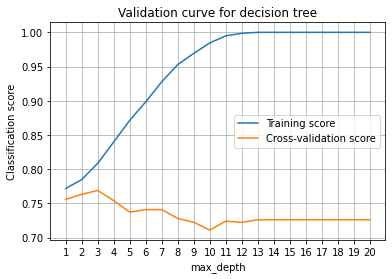

In [16]:
depth_range = np.arange(20) + 1
train_scores, test_scores = validation_curve(clf_dt, X_train, y_train, param_name="max_depth", param_range=depth_range, cv=5)

plt.figure()
plt.xticks(depth_range)
plt.plot(depth_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(depth_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for decision tree')
plt.xlabel('max_depth')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()

GridSearchCV is a utility in scikit-learn's model selection module that is used to perform hyperparameter tuning on a given machine learning model. It exhaustively searches over a specified hyperparameter space to find the best combination of hyperparameters that optimizes a given evaluation metric.

The main reason to use GridSearchCV is to find the best set of hyperparameters for a machine learning model, which can lead to improved model performance. By training a model with multiple hyperparameters and evaluating the performance using cross-validation, GridSearchCV can help to prevent overfitting and provide an estimate of the expected performance of the model on unseen data.

In [18]:
# Define the hyperparameter space to search
param_grid = {'criterion': ['entropy'],
              'max_depth': [None, 2, 3, 4, 5],
              'min_samples_split': [2, 3, 4, 5],
              'min_samples_leaf': [1, 2, 3, 4]}

In [19]:
# Create an instance of DecisionTreeClassifier
dtc = DecisionTreeClassifier()

# Create an instance of GridSearchCV
grid_search = GridSearchCV(dtc, param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV model to the data
grid_search.fit(X, y)
y_pred = grid_search.predict(X_test)
best_accuracy[0] = accuracy_score(y_test, y_pred)
print('Accuracy of decision tree is %.2f%%' % (best_accuracy[0] * 100))
# Get the best hyperparameters and the best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Accuracy of decision tree is 72.73%
Best parameters: {'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best score: 0.7383329089211441


Lets evaluate the model with paramters suggested by Gridsearch

In [30]:
dct_model = tree.DecisionTreeClassifier(max_depth =3,criterion='entropy',min_samples_leaf=1)
dct_model.fit(X_train, y_train)
dct_y_pred = dct_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dct_y_pred)
treeObj = dct_model.tree_
print(treeObj.node_count)
print(dct_model.tree_.max_depth)
print('Accuracy of decision tree with hyperparameter tuning is %.2f%%' % (dt_accuracy*100))

15
3
Accuracy of decision tree with hyperparameter tuning is 69.70%


In [22]:
from sklearn.metrics import  accuracy_score, f1_score, precision_score, recall_score, roc_auc_score
roc=roc_auc_score(y_test, dct_y_pred)
acc = accuracy_score(y_test, dct_y_pred)
prec = precision_score(y_test, dct_y_pred)
rec = recall_score(y_test, dct_y_pred)
f1 = f1_score(y_test, dct_y_pred)
results = pd.DataFrame([['Decision Tree Classifier', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,Decision Tree Classifier,0.69697,0.7,0.5,0.583333,0.671053


## Cross Validation 
Cross-validation is a technique for evaluating the performance of machine learning models
Lets evaluate the model aacuracy using cross validation on unseen data

In [29]:
from numpy.lib.function_base import average
from sklearn.model_selection import cross_val_score
scores = cross_val_score(grid_search,X, y, cv=5,scoring='accuracy')
print(average(scores))



0.7266191325014855


#Evaluation using confusion matrix

In [27]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[108,  25],
       [ 38,  60]])

## Learning curve
A learning curve is a plot that shows the relationship between the size of the training data and the performance of a machine learning model. It is a useful tool for understanding how well a model is able to learn from the data, and whether the model is suffering from overfitting or underfitting.
###Analysis:
For the Decision tree algorithm, both the validation score and the training score moves to a value that is  low with increasing size of the training set. Thus, we will probably not benefit much from more training data.

In contrast, for small amounts of data, the training score of the Decision tree is much greater than the validation score. Adding more training samples will most likely increase generalization.


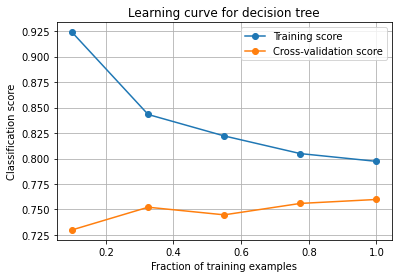

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(dct_model, X_train, y_train, train_sizes=train_sizes, cv=5, n_jobs=4)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for decision tree')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

plt.show()

# Neural Network

In [38]:
NN_model = MLPClassifier()
NN_model.fit(X_train, y_train)
NN_y_pred = NN_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, NN_y_pred)
print('Accuracy of Neural Network without hyperparameter tuning is %.2f%%' % (dt_accuracy*100))

Accuracy of Neural Network without hyperparameter tuning is 71.86%


In [39]:
roc=roc_auc_score(y_test, NN_y_pred)
acc = accuracy_score(y_test, NN_y_pred)
prec = precision_score(y_test, NN_y_pred)
rec = recall_score(y_test, NN_y_pred)
f1 = f1_score(y_test, NN_y_pred)
results = pd.DataFrame([['NN Classifier', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,NN Classifier,0.718615,0.703704,0.581633,0.636872,0.700591


#Validation curve

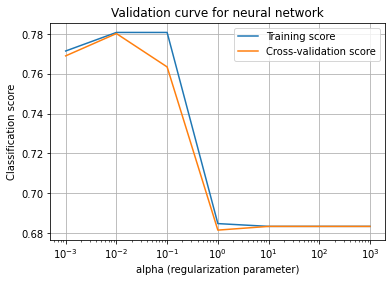

In [ ]:
# Regularization parameter



alpha_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(NN_model, X_train_scaled, y_train, param_name="alpha", param_range=alpha_range, cv=5)

plt.figure()
plt.semilogx(alpha_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(alpha_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for neural network')
plt.xlabel('alpha (regularization parameter)')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

plt.show()

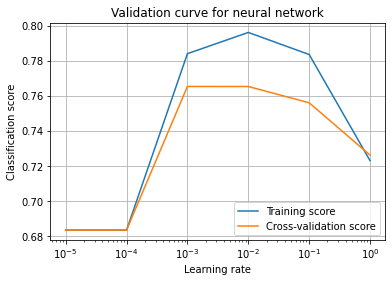

In [ ]:
# Learning rate
lr_range = np.logspace(-5, 0, 6)
train_scores, test_scores = validation_curve(NN_model, X_train_scaled, y_train, param_name="learning_rate_init", param_range=lr_range, 
                                             cv=5)

plt.figure()
plt.semilogx(lr_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(lr_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for neural network')
plt.xlabel('Learning rate')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

plt.show()

In [40]:
NN_model = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=7, max_iter=1000)
NN_model.fit(X_train, y_train)
NN_y_pred = NN_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, NN_y_pred)
print('Accuracy of Neural networks with hyperparameter tuning is %.2f%%' % (dt_accuracy*100))

Accuracy of Neural networks with hyperparameter tuning is 71.43%


## Hyperparameter tuning
Based on the validation curves plotted above, we will define an appropriate grid for each parameter and tune them.

In [41]:
# Define grid for grid search after observing validation curves
alpha_range = np.logspace(-1, 2, 5)
lr_range = np.logspace(-5, 0, 6)
tuned_params = {'alpha' : alpha_range, 'learning_rate_init' : lr_range}
NN_model = GridSearchCV(NN_model, param_grid=tuned_params, cv=5)
t0 = time.time()
NN_model.fit(X_train_scaled, y_train)
t1 = time.time()
train_time[1] = t1 - t0
print('Completed training in %f seconds' % train_time[1])
best_clf_nn = NN_model
best_params = NN_model.best_params_
print("Best parameters set found on development set:")
print(best_params)

Completed training in 60.755015 seconds
Best parameters set found on development set:
{'alpha': 0.1, 'learning_rate_init': 0.001}


#Cross Validation

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(best_clf_nn,X, y, cv=5,scoring='accuracy')
print(scores)

[0.76623377 0.77922078 0.75974026 0.79084967 0.79738562]


## Learning curve

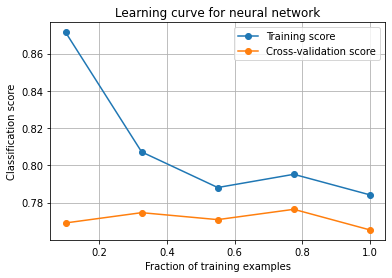

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_nn, X_train_scaled, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for neural network')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

plt.show()

## Loss curves
Lets observe how training error decreases with epochs.

Accuracy of neural network is 72.73%


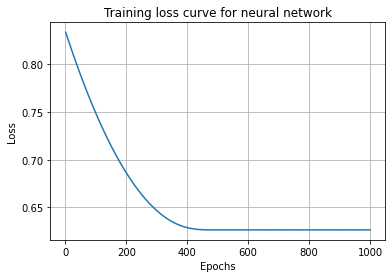

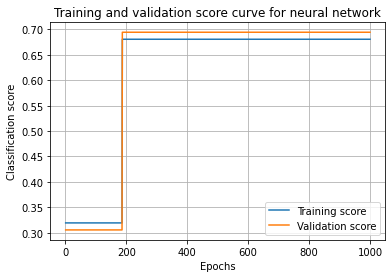

In [ ]:
clf_nn = MLPClassifier(hidden_layer_sizes=(5, 2), random_state=7, max_iter=1, warm_start=True)
clf_nn.set_params(alpha=best_params['alpha'], learning_rate_init=best_params['learning_rate_init'])
num_epochs = 1000
train_loss = np.empty(num_epochs)
train_scores = np.empty(num_epochs)
val_scores = np.empty(num_epochs)
# Split training set into training and validation
X_train1, X_val, y_train1, y_val = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=18)
for i in range(num_epochs):
    clf_nn.fit(X_train1, y_train1)
    train_loss[i] = clf_nn.loss_
    train_scores[i] = accuracy_score(y_train1, clf_nn.predict(X_train1))
    val_scores[i] = accuracy_score(y_val, clf_nn.predict(X_val))

nn_y_pred = clf_nn.predict(X_test_scaled)
nn_accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of neural network is %.2f%%' % (nn_accuracy * 100))

xrange = np.arange(num_epochs) + 1
plt.figure()
plt.plot(xrange, train_loss)
plt.title('Training loss curve for neural network')
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.grid()
#plt.savefig(fig_path + 'nn_train_loss.png')
plt.show()

plt.figure()
plt.plot(xrange, train_scores, label='Training score')
plt.plot(xrange, val_scores, label='Validation score')
plt.title('Training and validation score curve for neural network')
plt.xlabel('Epochs')
plt.ylabel("Classification score")
plt.grid()
plt.legend(loc="best")
#plt.savefig(fig_path + 'nn_score_curve.png')
plt.show()

AdaBoosting

In [50]:
# Train the AdaBoost Classifier using a DecisionTreeClassifier as the base classifier
dt = DecisionTreeClassifier(max_depth=1, random_state=1)
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=50, random_state=1)
ada.fit(X_train_scaled, y_train)
# Predict the target variable for the test set
aday_pred = ada.predict(X_test_scaled)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, aday_pred)
print('Accuracy: %.2f' % accuracy)

Accuracy: 0.67


In [51]:
roc=roc_auc_score(y_test, aday_pred)
acc = accuracy_score(y_test, aday_pred)
prec = precision_score(y_test, aday_pred)
rec = recall_score(y_test, aday_pred)
f1 = f1_score(y_test, aday_pred)
results = pd.DataFrame([['AdaBoosting', acc,prec,rec, f1,roc]],
columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,AdaBoosting,0.670996,0.58871,0.744898,0.657658,0.68072


Hyperparameter tuning

In [46]:
# Define the base classifier
dt = DecisionTreeClassifier(max_depth=1, random_state=1)

# Define the AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, random_state=1)

# Define the hyperparameter grid to search over
param_grid = {'n_estimators': [50, 100, 200, 300],
              'learning_rate': [0.01, 0.1, 1.0, 2.0]}

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(ada, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding accuracy
print('Best parameters: ', grid_search.best_params_)
print('Best accuracy: %.2f' % grid_search.best_score_)

# Train the AdaBoostClassifier using the best hyperparameters
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=grid_search.best_params_['n_estimators'],
                         learning_rate=grid_search.best_params_['learning_rate'], random_state=1)
ada.fit(X_train, y_train)

# Predict the target variable for the test set
y_pred = ada.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: %.2f' % accuracy)

Best parameters:  {'learning_rate': 0.1, 'n_estimators': 100}
Best accuracy: 0.78
Accuracy: 0.73


#Validation Curve

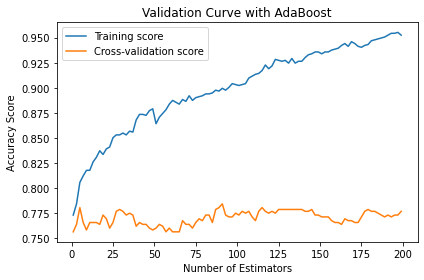

In [48]:
# Define the base classifier
dt = DecisionTreeClassifier(max_depth=1, random_state=1)

# Define the range of n_estimators to evaluate
param_range = np.arange(1, 200, 2)

# Train the AdaBoost Classifier using a DecisionTreeClassifier as the base classifier
train_scores, test_scores = validation_curve(
    AdaBoostClassifier(base_estimator=dt, random_state=1), X_train_scaled, y_train,
    param_name="n_estimators", param_range=param_range, cv=3, scoring="accuracy", n_jobs=-1)

# Calculate the mean and standard deviation for the training scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate the mean and standard deviation for the test scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the validation curve
plt.plot(param_range, train_mean, label="Training score")
plt.plot(param_range, test_mean, label="Cross-validation score")



# Add labels and a title to the plot
plt.xlabel("Number of Estimators")
plt.ylabel("Accuracy Score")
plt.title("Validation Curve with AdaBoost")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

#Learning Curve

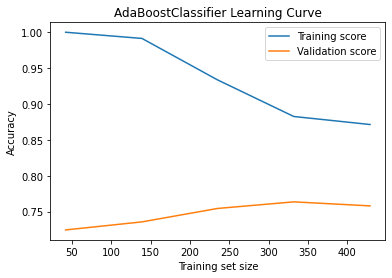

In [49]:
# Define the base classifier
dt = DecisionTreeClassifier(max_depth=1, random_state=1)

# Define the AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator=dt, n_estimators=50, learning_rate=1.0, random_state=1)

# Calculate the training and validation scores for different sizes of the training set
train_sizes, train_scores, valid_scores = learning_curve(ada, X_train_scaled, y_train, cv=5)

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Training score')
plt.plot(train_sizes, valid_scores.mean(axis=1), label='Validation score')
plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('AdaBoostClassifier Learning Curve')
plt.legend()
plt.show()

#Support Vector Machines
We will use an SVM with a linear kernel.

In [ ]:
SVM_db_model = SVC(C = 10)

SVM_db_model.fit(X_train_scaled, y_train)
svm_y_pred = SVM_db_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, svm_y_pred)
print('Accuracy of Support Vector Machines with hyperparameter tuning is %.2f%%' % (dt_accuracy*100))

Accuracy of Support Vector Machines with hyperparameter tuning is 69.26%


In [ ]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

# Validation curve
Let's plot the training and cross-validation scores wrt the penalty parameter $C$ (which controls regularization).

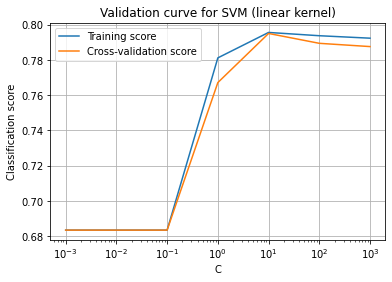

In [ ]:

C_range = np.logspace(-3, 3, 7)
train_scores, test_scores = validation_curve(svm_linear, X_train_scaled, y_train, param_name="C", param_range=C_range, cv=5)

plt.figure()
plt.semilogx(C_range, np.mean(train_scores, axis=1), label='Training score')
plt.semilogx(C_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for SVM (linear kernel)')
plt.xlabel('C')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

plt.show()

# Hyperparameter tuning
Based on the validation curve plotted above, we will now define an appropriate grid for $C$ and tune it.

In [ ]:
C_range = np.logspace(-2, 1, 10)
tuned_params = {'C' : C_range}
svm_linear = GridSearchCV(svm_linear, param_grid=tuned_params, cv=5)
t0 = time.time()
svm_linear.fit(X_train_scaled, y_train)
t1 = time.time()
train_time[3] = t1 - t0
print('Completed training in %f seconds' % train_time[3])
best_clf_svm = svm_linear
best_params = svm_linear.best_params_
print("Best parameters set found on development set:")
print(best_params)
t0 = time.time()
y_pred = best_clf_svm.predict(X_test_scaled)
t1 = time.time()
test_time[3] = t1 - t0
print('Inference time on test data: %f seconds' % test_time[3])
best_accuracy[3] = accuracy_score(y_test, y_pred)
print('Best accuracy with SVM (linear kernel) is %.2f%%' % (best_accuracy[3] * 100))

Completed training in 0.606644 seconds
Best parameters set found on development set:
{'C': 10.0}
Inference time on test data: 0.003979 seconds
Best accuracy with SVM (linear kernel) is 73.16%


# Learning curve

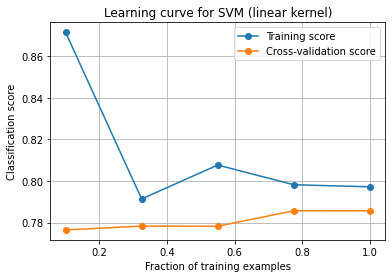

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(best_clf_svm, X_train_scaled, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for SVM (linear kernel)')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_learning_curve.png')
plt.show()

#KNN
KNN algorithm is to classify a given data point based on the majority class of its K nearest neighbors in the training data.

The algorithm can be sensitive to the choice of K, and selecting an appropriate value of K can be challenging

In [42]:
k_range = np.arange(1, 101)

k_optimal = 7
KNN_db_model = KNeighborsClassifier(n_neighbors=k_optimal)

KNN_db_model.fit(X_train_scaled, y_train)
knn_y_pred = KNN_db_model.predict(X_test_scaled)
dt_accuracy = accuracy_score(y_test, knn_y_pred)
print('Accuracy of Support Vector Machines with hyperparameter tuning is %.2f%%' % (dt_accuracy*100))

Accuracy of Support Vector Machines with hyperparameter tuning is 69.70%


In [43]:
roc=roc_auc_score(y_test, knn_y_pred)
acc = accuracy_score(y_test, knn_y_pred)
prec = precision_score(y_test, knn_y_pred)
rec = recall_score(y_test, knn_y_pred)
f1 = f1_score(y_test, knn_y_pred)
model_results = pd.DataFrame([['k-nearest neighbors', acc,prec,rec, f1,roc]],
                columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results,ignore_index = True)
results

,Model,Accuracy,Precision,Recall,F1 Score,ROC
0,NN Classifier,0.718615,0.703704,0.581633,0.636872,0.700591
1,k-nearest neighbors,0.696970,0.618644,0.744898,0.675926,0.703276


##Validation Curve
Lets plot the validation curve to understand the effect of K value on performance 

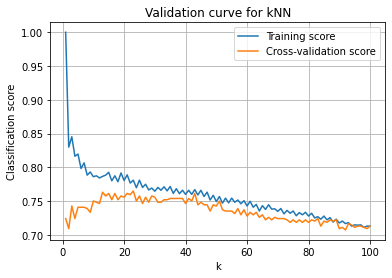

In [ ]:
k_range = np.arange(1, 101)
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X_train_scaled, y_train, param_name="n_neighbors", 
                                             param_range=k_range, cv=5)

plt.figure()
plt.plot(k_range, np.mean(train_scores, axis=1), label='Training score')
plt.plot(k_range, np.mean(test_scores, axis=1), label='Cross-validation score')
plt.title('Validation curve for kNN')
plt.xlabel('k')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()
#plt.savefig(fig_path + 'dt_validation_curve_1.png')
plt.show()

# Hyperparameter tuning
Based on the validation curve plotted above, we will now define an appropriate grid for K and tune it.

In [ ]:
param_grid = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform', 'distance']}



best_clf_knn = KNeighborsClassifier()
grid_search = GridSearchCV(best_clf_knn, param_grid, cv=5)

t0 = time.time()
grid_search.fit(X_train_scaled, y_train)
t1 = time.time()
print('Completed training in %f seconds' % train_time[3])

best_params = grid_search.best_params_
print("Best parameters set found on development set:")
print(best_params)
t0 = time.time()

# Get the best hyperparameters found by GridSearchCV
print("Best hyperparameters: ", grid_search.best_params_)

# Get the best cross-validation score achieved
print("Best CV accuracy: ", grid_search.best_score_)

# Get the test set accuracy of the best model
print("Test set accuracy: ", grid_search.score(X_test, y_test))

Completed training in 0.606644 seconds
Best parameters set found on development set:
{'n_neighbors': 7, 'weights': 'distance'}
Best hyperparameters:  {'n_neighbors': 7, 'weights': 'distance'}
Best CV accuracy:  0.7448251990308065
Test set accuracy:  0.6926406926406926


In [ ]:
# Create a KNN classifier object with n_neighbors=5 and a uniform weighting
knn = KNeighborsClassifier(n_neighbors=7, weights='distance')
# Fit the classifier to the training data
knn.fit(X_train_scaled, y_train)

# Use the trained classifier to make predictions on the test data
y_pred = knn.predict(X_train_scaled)
# Evaluate the accuracy of the classifier
accuracy = knn.score(X_train_scaled, y_pred)
print("Accuracy:", accuracy)
print('Best accuracy with KNN  is %.2f%%' % (accuracy * 100))

Accuracy: 1.0
Best accuracy with KNN  is 100.00%


## Learning Curve

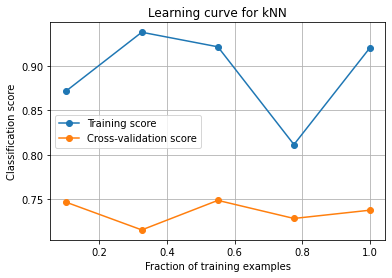

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 5)
_, train_scores, test_scores = learning_curve(grid_search, X_train_scaled, y_train, train_sizes=train_sizes, cv=5)

plt.figure()
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-validation score')
plt.title('Learning curve for kNN')
plt.xlabel('Fraction of training examples')
plt.ylabel("Classification score")
plt.legend(loc="best")
plt.grid()

plt.show()

Cross Validation using KFold for all Models

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier



models = []

models.append(("Decision Tree:",DecisionTreeClassifier()))
models.append(("Neural network:",MLPClassifier()))
models.append(("eXtreme Gradient Boost:",XGBClassifier()))
models.append(("Support Vector Machine-linear:",SVC(kernel="linear",C=0.2)))
models.append(("Support Vector Machine-rbf:",SVC(kernel="rbf")))
models.append(("K-Nearest Neighbour:",KNeighborsClassifier(n_neighbors=3)))





print('Models appended...')

Models appended...


In [ ]:
results = []
names = []
for name,model in models:
    kfold = KFold(n_splits=5)
    cv_result = cross_val_score(model,X_train,y_train, cv = kfold,scoring = "accuracy")
    names.append(name)
    results.append(cv_result)
for i in range(len(names)):
    print(names[i],results[i].mean()*100)

Decision Tree: 69.82866043613706
Neural network: 76.53686396677051
eXtreme Gradient Boost: 75.98303911388024
Support Vector Machine-linear: 78.20872274143302
Support Vector Machine-rbf: 75.42402215299411
K-Nearest Neighbour: 73.75216337833159
